In [1]:
import os
import numpy as np
import re
import pickle
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import json

sys.path.insert(1, '../')
# from SeasonalPlot_Functions import *
from CharacteristicsPlot_Functions import *

In [2]:
home_dir = '/nfs/a319/gy17m2a/PhD/'
home_dir2 = '/nfs/a161/gy17m2a/PhD/'

### Get the data

In [3]:
df_long=pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/UKCP18_30mins/all_events_characteristics.csv")
df_long['dur_for_which_this_is_amax'] = df_long['dur_for_which_this_is_amax'].apply(json.loads)

present=df_long[df_long['Climate']=='Present']
future=df_long[df_long['Climate']=='Future']
nimrod = pd.read_csv(home_dir + f"ProcessedData/AMAX_Events/NIMROD_30mins/all_events_characteristics.csv")

In [4]:
print(len(future))
print(len(present))
print(len(nimrod))

858784
1052902
78230


## Plot present vs NIMROD on one plot

In [5]:
bin_edges_intensity = np.arange(0, 70 + 5, 2)
bin_edges_volume = np.arange(0, 135 + 5, 3)
bin_edges_duration = np.arange(0, 60 + 5,1)

In [6]:
def plot_histogram_for_duration(df, variable, duration, duration_variable, ax, bins=25, label=None, color=None, alpha=0.5, density=True):
    # Filter the DataFrame for the specified duration
    duration_data = df[df[duration_variable].apply(
        lambda x: isinstance(x, list) and str(duration) in x or x == str(duration))]
    # Plot histogram for the specified duration with density normalization
    if not duration_data.empty:
        n, bins_used, patches = ax.hist(duration_data[variable], bins=bins, alpha=alpha, label=label, color=color, edgecolor='black', density=density)
    else:
        pass

    # Set y-axis label to the specific duration bin it refers to
    ax.set_ylabel(f"{duration}hrs", fontsize=10, rotation=0)
    # Remove y-tick labels
    # ax.set_yticks([])
    
def plot_histogram(df, variable, duration, duration_variable, ax, bins=25, label=None, color=None, alpha=0.5, density=True):
    # Plot histogram for the specified duration with density normalization
    n, bins_used, patches = ax.hist(df[variable], bins=bins, alpha=alpha, label=label, color=color, edgecolor='black', density=density)

    # Set y-axis label to the specific duration bin it refers to
#     ax.set_ylabel(f"{duration}hrs", fontsize=10, rotation=0)
    # Remove y-tick labels
    # ax.set_yticks([])
    

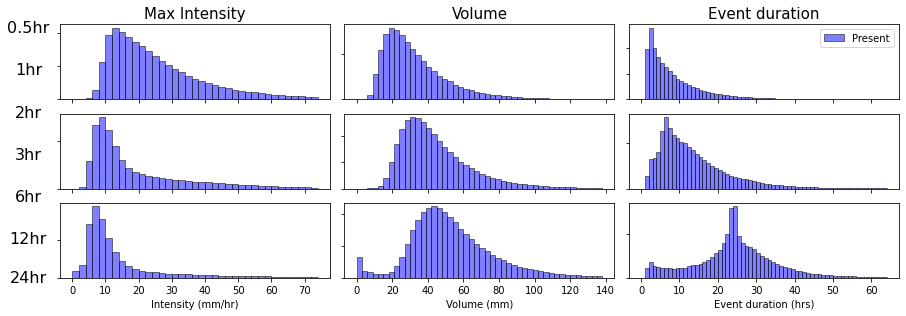

In [7]:
durations = ['1', '6', '24']

# Create a figure with subplots for different durations
n_categories = len(durations)
n_variables = 3
fig, axs = plt.subplots(n_categories, n_variables, figsize=(12, 1.5 * n_categories), sharex='col')  

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(present, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(nimrod, variable='max_intensity', duration=float(duration), duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="NIMROD", color='orange', alpha=0.7)
    
    plot_histogram_for_duration(present, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(nimrod, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="NIMROD", color='orange', alpha=0.7)
        
    plot_histogram_for_duration(present, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(nimrod, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="NIMROD", color='orange', alpha=0.7)
        
    # Set x-axis labels for the last row
    if i == n_categories - 1:
        axs[i,0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i,1].set_xlabel("Volume (mm)", fontsize=10)
        axs[i,2].set_xlabel("Event duration (hrs)", fontsize=10)
        
    axs[0,0].set_title("Max Intensity", fontsize=15)
    axs[0,1].set_title("Volume", fontsize=15)
    axs[0,2].set_title("Event duration", fontsize=15)
    
    axs[0,2].legend(loc='upper right')

for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_ylabel("")

fig.text(-0.02, 0.9, '0.5hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.77, '1hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.64, '2hr', va='center', ha='center', fontsize=16, rotation='horizontal');      
fig.text(-0.02, 0.51, '3hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.38, '6hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.25, '12hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.13, '24hr', va='center', ha='center', fontsize=16, rotation='horizontal');  

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Plot present vs future

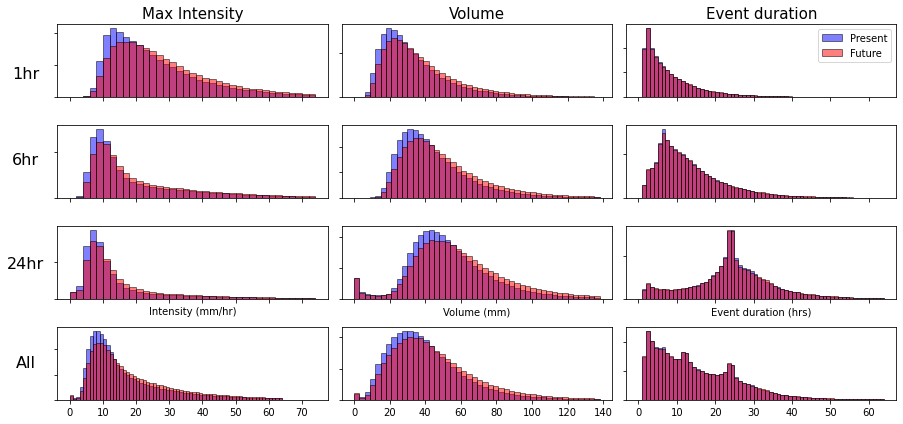

In [8]:
durations = ['1', '6', '24']

# Create a figure with subplots for different durations
n_categories = len(durations)
n_variables = 3
fig, axs = plt.subplots(n_categories+1, n_variables, figsize=(12, 2 * n_categories), sharex='col')  

# Call the function for each variable in each duration category
for i, duration in enumerate(durations):
    plot_histogram_for_duration(present, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(future, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,0], bins=bin_edges_intensity, label="Future", color='red', alpha=0.5)
    
    plot_histogram_for_duration(present, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(future, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,1], bins=bin_edges_volume, label="Future", color='red', alpha=0.5)
        
    plot_histogram_for_duration(present, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="Present", color='blue', alpha=0.5)
    plot_histogram_for_duration(future, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[i,2], bins=bin_edges_duration, label="Future", color='red', alpha=0.5)
        
    # Set x-axis labels for the last row
    if i == n_categories - 1:
        axs[i,0].set_xlabel("Intensity (mm/hr)", fontsize=10)
        axs[i,1].set_xlabel("Volume (mm)", fontsize=10)
        axs[i,2].set_xlabel("Event duration (hrs)", fontsize=10)
        
    axs[0,0].set_title("Max Intensity", fontsize=15)
    axs[0,1].set_title("Volume", fontsize=15)
    axs[0,2].set_title("Event duration", fontsize=15)
    
    axs[0,2].legend(loc='upper right')

for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_ylabel("")

    
# Add the all data    
plot_histogram(present, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[3,0], bins=bin_edges_duration, label="Future", color='blue', alpha=0.5)
plot_histogram(present, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[3,1], bins=bin_edges_volume, label="Present", color='blue', alpha=0.5)
plot_histogram(present, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[3,2], bins=bin_edges_duration, label="Present", color='blue', alpha=0.5)
    
plot_histogram(future, variable='max_intensity', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[3,0], bins=bin_edges_duration, label="Future", color='red', alpha=0.5)
plot_histogram(future, variable='Volume', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[3,1], bins=bin_edges_volume, label="Present", color='red', alpha=0.5)
plot_histogram(future, variable='duration', duration=duration, duration_variable="dur_for_which_this_is_amax", ax=axs[3,2], bins=bin_edges_duration, label="Present", color='red', alpha=0.5)
        
    
fig.text(-0.02, 0.82, '1hr', va='center', ha='center', fontsize=16, rotation='horizontal')
fig.text(-0.02, 0.62, '6hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.38, '24hr', va='center', ha='center', fontsize=16, rotation='horizontal');  
fig.text(-0.02, 0.15, 'All', va='center', ha='center', fontsize=16, rotation='horizontal');  

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()